In [134]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [136]:
# Importing the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from datetime import datetime

In [137]:
# Reading the file 'link_by_areas.csv' and stoing it as a dataframe
df = pd.read_csv('link_by_areas.csv')

In [138]:
df.head()

,type,link
0,Accounting Jobs,https://www.naukri.com/accounting-jobs?xt=cats...
1,Interior Design Jobs,https://www.naukri.com/interior-design-jobs?xt...
2,Bank Jobs,https://www.naukri.com/bank-jobs?xt=catsrch&qf...
3,Content Writing Jobs,https://www.naukri.com/content-writing-jobs?xt...
4,Consultant Jobs,https://www.naukri.com/consultant-jobs?xt=cats...


In [139]:
#extraction of texts using selenium library and beautifulsoup
options=Options()
def extract(page,url):
    headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"}
    
    if page == 0:
        page_url = f"{url}"
    else:
        page_url = f"{url.split('?')[0]}-{page + 1}?{url.split('?')[1]}"
           
    driver = webdriver.Chrome(options=options) # i am using Chrome webdriver here
    driver.get(page_url)

    time.sleep(15)            
    # i tried using just beautiful soup but it didn't worked seems like website has JavaScript-rendered pages, which was not able to pass values in later stage of the code
    #r = requests.get(page_url,headers)
    soup = BeautifulSoup(driver.page_source,'html5lib')
    driver.close()
   # soup = BeautifulSoup(r.content, 'html.parser')
    return soup
    
    #return r.status_code
   # return page_url

#print (extract(1,'https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1'))

<html lang="en"><head><meta charset="utf-8"/><link href="https://www.googletagmanager.com" rel="dns-prefetch"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/e30146f59d01ccf5.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/6d152f98b59da981.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/585c79ef85a80701.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/b09725aaa4a54f31.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/07c7a898b0b8cd1d.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/d006e676502fe1bd.css" rel="stylesheet"/><link data-precedence="next" href="https://static.naukimg.com/s/9/121/_next/static/css/6935a7bfd6ac6391.css" rel="stylesheet"/>
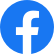
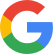

In [140]:
#checking code for a particular link
test = 'https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1'
c=extract(2,test)
c

In [147]:
# Initialize a list to store extracted job details
job_details_list = []

In [148]:
#transforming text from extracted html

def transform(soup,type_job):
    root_class1 = soup.find('div', class_='styles_srp-container__BXVFt styles_srp-container--extra__hiLD3')
    root_class2 =root_class1.find('main', class_='styles_srpc__main__NmWcc')
    root_class3 =root_class2.find('div', class_='styles_srpc__content__h6cyr')
    
    base_class1 =root_class3.find('div', class_='styles_middle-section-container__iteRZ')
    base_class2 =base_class1.find('div', class_='styles_job-listing-container__OCfZC')
    base_class3 =base_class2.find('div', class_='styles_jlc__main__VdwtF')
    
    
    divs = base_class3.find_all('div', class_= 'srp-jobtuple-wrapper')
    
    for item in divs:
        try:
            job_title = item.find('a', class_='title').text
        except:
            job_title=''
            
        try:   
            company_name = item.find('a', class_='comp-name').text 
        except:
            company_name=''
        
       
        try:
    
            rating= item.find('a', class_='rating').find('span', class_='main-2').text
        except:
            rating=''
        
        try:
            reviews = item.find('a', class_='review ver-line').text if soup.find('a', class_='review ver-line') else ''
        except:
            reviews=''
       
        try:
            experience = item.find('span', class_='expwdth').text
        except:
            experience=''
        
        
        try:
            #salary_span = item.find('span', class_='ni-job-tuple-icon ni-job-tuple-icon-srp-rupee sal')
            #salary = salary_span.find('span', class_='').text
            salary = item.find('span', class_='sal-wrap ver-line').find('span', class_='ni-job-tuple-icon ni-job-tuple-icon-srp-rupee sal').find('span').text
        except:
            salary=''
            
        try:
            location = item.find('span', class_='locWdth').text
        except:
            location=''
        
        try:
            description = item.find('span', class_='job-desc').text
        except:
            description=''
            
        tags = [tag.text for tag in soup.find_all('li', class_='tag-li')]
        posting_date = item.find('span', class_='job-post-day').text if soup.find('span', class_='job-post-day') else ''
        
        #adding timestamp
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        # storing the extracted job details in a dictionary
        job_details = {
            'Job Type' : type_job,
            'Job Title': job_title,
            'Company Name': company_name,
            'Rating': rating,
            'Reviews': reviews,
            'Experience': experience,
            'Salary': salary,
            'Location': location,
            'Description': description,
            'Tags': ', '.join(tags),
            'Posting Date': posting_date,
            'Scraping time':timestamp
        }
         # appended the job details to the list
        job_details_list.append(job_details)
    return
    
    #return len(divs)

In [149]:
# iterating through each row in the Excel file
for index, row in df.iterrows():
    category = row['type']
    url = row['link']
    page = 0  # Start from page 1

    for page in range(0,3): # to avoid computation time i have restricted page to be traversed as 3. 
        #If all pages are to be traversed then we can replace for loop with while and run it untill it is true.
        c= extract(page,url)
        d= transform(c,category)
        


In [150]:

# creating a DataFrame from the extracted job details
output_df = pd.DataFrame(job_details_list)


In [151]:

# saving the DataFrame to an output CSV file
output_df.to_csv('output_job_details.csv', index=False)
